# Formalia:

Please read the [assignment overview page](https://github.com/SocialComplexityLab/socialgraphs2022/wiki/Assignments) carefully before proceeding. This page contains information about formatting (including formats etc), group sizes, and many other aspects of handing in the assignment. 

_If you fail to follow these simple instructions, it will negatively impact your grade!_

**Due date and time**: The assignment is due on Tuesday September 27th, 2022 at 23:55. Hand in your IPython notebook file (with extension `.ipynb`) via http://peergrade.io/

# Part 1: Binning degree distributions


#### A. Binning real numbers
  * Let's do a gentle start and use the `random` library generate 5000 data points from a Gaussian distribution with $\mu = 2$ and $\sigma = 0.125$.

In [1]:
# Imports for Part 1
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import random

from tqdm.notebook import tqdm

random.seed(13) # set the random seed for reproducibility
np.random.seed(13)

Use the function `gauss` from `random` library. Use as `random.gauss`. [Documentation](https://docs.python.org/3/library/random.html#random.gauss)

In [2]:
num_points = 5000 # number of points to generate from the Gaussian
mu_ = 2 # mean value of the Gaussian distribution
sigma_ = 0.125 # standard deviation for the Gaussian

# Generate a vector x that contains a sequence that follows the Gaussian distribution using the random library. Could also use numpy.random.normal method
x = np.array([ random.gauss(mu_, sigma_) for _ in range(num_points)]) 

* Now, let's use `numpy.histogram` to bin those number into 10 bins. What does the `numpy.histogram` function return? Do the two arrays have the same length?  
---
__Answer:__  
Use of the function `histogram` from the `numpy` library. [Documentation](https://numpy.org/doc/stable/reference/generated/numpy.histogram.html)

A histogram is created from a sequence as follows:  
Each element of the sequence is compared to the predefined values, that mark the beginning and end of a bin. The larger, or right, value of the bin is excluded. If the sequence element's value is between the edge values of a bin, then it falls inside this bin and this bin's count value is incremented by one. Finally, the histogram is plotted with the bin edge values on the x-axis and the counts for each bin on the y-axis. 

The function `histogram` return a tuple that contains two vectors:  
- The first, denoted as `hist` in the code of the following cell, stores that values of the histogram. These values are the counts of values that fall between the edges of each bin and are shown on the y-axis of the histogram.
- The second vector, denoted as `bin_edges`, stores that edge values for each bin.

In [3]:
num_bins = 10 # number of bins for the histogram
hist, bin_edges = np.histogram(x, bins=num_bins)
print(f"Length of the histogram values vector: {len(hist)}")
print(f"Length of the histogram's bin edges vector: {len(bin_edges)}")

Length of the histogram values vector: 10
Length of the histogram's bin edges vector: 11


As can be seen from the output dimensions of the `histogram`'s output vectors in the cell above, as well as read in the documentation, the lengths of the two vectors are different. More specific, the length of the `bin_edges` vector has one more element than the `hist` vector. This makes sence also conceptually, since for one count value, two values are needed two mark the beginning and edge of the bin. Moreover, two consecutive bins share one edge value. As a result, for 10 bins, the `bin_edges` vector has $11$ elements and the `hist` vector has $10$ elements.

* Then we use `matplotlib.pyplot.plot` to plot the binned data. You will have to deal with the fact that the counts- and bin-arrays have different lengths. Explain how you deal with this problem and why. 
---
__Answer:__
    The problem of different lengths for the two vectors to plot, the `bin_edges` for x-axis and `hist` for y-axis is solved by not including the last, rightmost bin edge. Since we know the right value of the last bin, we can assume that after this all counts are 0. But this information need not be shown, so for plotting the histogram it is of no use. We can set the axis limits to contain the information to the limits of the bins. 
    
To plot the histogram, the function `plot` from module `pyplot` of the library `matplotlib` is used. [Documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)  

If only the plot function is used, each histogram count value on the y-axis starts from the left most edge value of each bin. As a result, this point is denoted in the plot with the circular marker.

Text(0.5, 1.0, 'Histogram for a sequence of 5000 following a Gaussian distribution with $\\mu$=2 and $\\sigma$= 0.125')

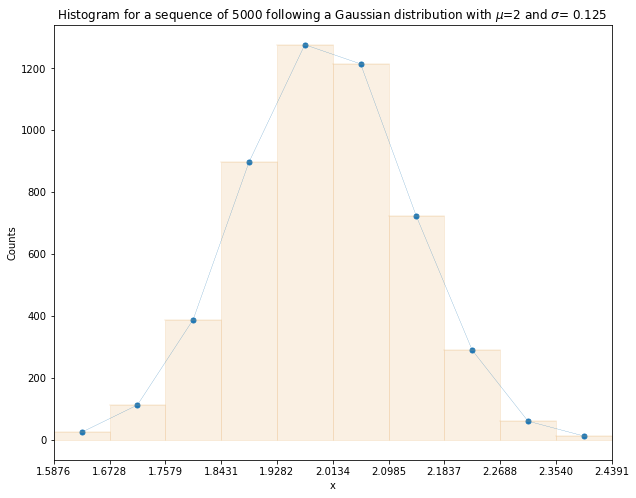

In [9]:
fig = plt.figure(figsize=(10,8))
# In order to center the markers of the plot, the x axis of each histogram value is set to be in the middle of the bin
x_axis_centered = [(bin_edges[i] + bin_edges[i+1])/2. for i in range(len(hist))]
plt.plot(x_axis_centered, hist, '-o', markersize=5, linewidth=0.2) # The value starts from the beginning of the bin. Can be moved to middle

# Plot the continuous values for hist between the bins
for i in range(len(hist)):
    x_ = bin_edges[i:i+2]
    y_ = 2*[hist[i]]
    plt.plot(x_, y_, '#eab676', alpha=0.2)
    # Fill the area between the y and x axis to show the bars
    plt.fill_between(
        x_,
        y_,
        color='#eab676',
        alpha=0.2
    )

ax = plt.gca()
ax.set(xlim=(bin_edges[0], bin_edges[-1])) # set the x axis labels to the region of interest

plt.xlabel('x')
plt.xticks(bin_edges)
plt.ylabel('Counts')
plt.title(f'Histogram for a sequence of {num_points} following a Gaussian distribution with '+ '$\mu$='+f"{mu_} and "+"$\sigma$= "+f"{sigma_}")

#### B. Binning integers
  * But binning real numbers into a fixed number of bins is easy when `numpy.histogram` does all the work and finds the right bin boundaries for you. 
Now we'll generate a bunch of integers and set the bin boundaries manually. This time, let's grab data from a Poisson distribution. As it turns out `numpy` also has some convenient random number generators. Use `numpy.random.poisson` to generate 5000 numbers drawn from a Poisson distribution characterized by $\lambda = 10$. Find the maximum and minimum value of your 5000 random numbers. 
---
Use of `poisson` function of the module `random` of the `numpy` library. [Documentation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.poisson.html)  

The maximum and minimum numbers of the sequence are shown in the output of the following cell.

In [24]:
num_points_poisson = 5000 # set the number of points to generate for the Poisson distribution
lambda_poisson = 10 # Poisson distribution parameter

# Generate sequence of points that follow a Poisson distribution
x_poisson = np.random.poisson(lambda_poisson, num_points_poisson) 
x_poisson_max = x_poisson.max()
x_poisson_min = x_poisson.min()

print(f'The maximum value of the sequence is: {x_poisson_max}')
print(f'The minimum value of the sequence is: {x_poisson_min}')


The maximum value of the sequence is: 22
The minimum value of the sequence is: 2


* Instead of simplify specifying the number of bins for `numpy.histogram`, let's specify the bins we want using a vector. Create a vector $v$ that results in a binning that puts each integer value in its own bin and where the first bin contains the minimum number you found above, and the last bin contains the maximum number (you may want to think about how `numpy.histogram` deals with the smallest and largest value in particular; is it correct to set the first entry of $v$ to be equal to the smallest value you observe and the last entry of $v$ to be the highest value observed?). 
---
__Answer:__  
Since all the numbers of the sequence are contained between the minimum and maximum values, we can use these values for the left edge  of the first bin and the right value of the last bin, respectively. Care is take to include the maximum value  element in the vector `v`. This is done by setting the upper, not included, limit value to the maximum value of the sequence plus the step, which is 1.

In [25]:
step = 1 # each integer is in its own bin, so the step is 1
v = np.arange(x_poisson_min, x_poisson_max+step, step) # the last element of the p_points must be included in the range vector
v.shape

(21,)

Use the vector by setting `numpy.histogram`'s `bin` parameter as `bin = ` $v$. What is the sum over bin counts? Explain how the binning-vectors first and last element relates to the min and max from the Poisson distribution.  

---
__Answer:__  
The sum over the bin counts shoud be equal to the number of points in the sequence. Also, since all the elements of the sequence should be contained inside the bins, the first bin's left value should correspond to the minimum value of the sequence, while the right edge of the last bin should have a value equal to the maximum number found in the sequence. The code in the following cell calculates the bin values and outputs the first and last bin values to compare with the minimum and maximum elements of the sequence. Moreover, it outputs the sum over all the counts.

In [26]:
hist_p, bin_edges_p = np.histogram(x_poisson, bins=v)
print(f"The sum over the bin counts is: {np.sum(hist)}.\nIt should be equal to the number of elements in the sequence: {num_points_poisson}.")
print(f"The first element of the binning vector is {bin_edges[0]}, and the last is {bin_edges[-1]}")
print(f"The lowest value in the Poisson sequence is {x_poisson_min} and the highest value is {x_poisson_max}.")

The sum over the bin counts is: 5000.
It should be equal to the number of elements in the sequence: 5000.
The first element of the binning vector is 0, and the last is 23
The lowest value in the Poisson sequence is 2 and the highest value is 22.


 * Now, use a bar chart (`matplotlib.pyplot.bar`) to plot the distribution  
 ---
 Use of `bar` function in `matplotlib.pyplot`. [Documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html)

Text(0, 0.5, 'Counts')

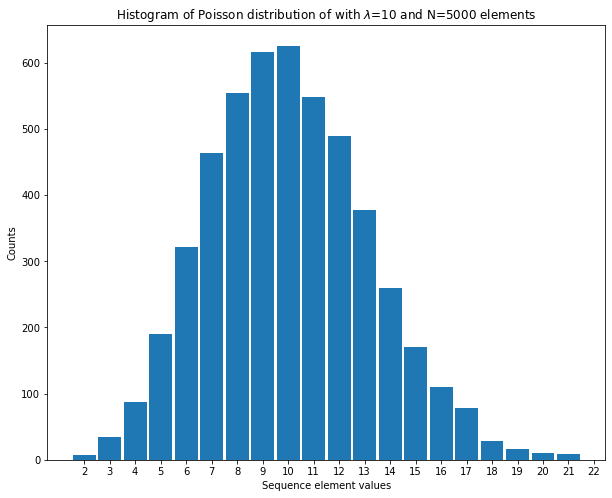

In [27]:
fig = plt.figure(figsize = (10,8))

plt.bar(bin_edges_p[:-1], hist_p, width=.9)

plt.title('Histogram of Poisson distribution of with $\lambda$='+f"{lambda_poisson} and N={num_points_poisson} elements")
plt.xlabel('Sequence element values')
plt.xticks(bin_edges_p)
plt.ylabel('Counts')

#### C. Binning and plotting degree distributions. 
  * Let's generate the Erdös-Renyi (ER) network which has a degree distribution that matches the Poisson distribution above. 
First we have to figure out which values the ER parameters (_N_ and _p_) should assume. It's easy to see that $N = 5000$, but how do you find $p$? 
**Hint**: The parameter $\lambda$ in the Poisson distribution corresponds to the average degree, so you have to find a $p$ that results in an average degree, $k = 10$. And you know that $\langle k \rangle = p (N-1)$, which will give you $p$.  

---
__Answer:__
The library `networkx` is used. More specifically, an object of the class `erdos_renyi_graph` is created with the required parameters. [Documentation](https://networkx.org/documentation/stable/reference/generated/networkx.generators.random_graphs.erdos_renyi_graph.html#erdos-renyi-graph)  

The arguments for the `erdos_renyi_graph` constructor are the number of nodes, $n$ and the probability of edge creation $p$.
Since the mean of the Poisson distribution is $\lambda$, which is given in the question above as $\lambda=10$ and from random network theory, for large $N$ number of nodes, $\langle k\rangle \approx \lambda$. Moreover, from equation (3.3) of [random networks](http://networksciencebook.com/chapter/3#number-of-links), we know that:

$$
\langle k \rangle = p(N-1) \rightarrow p \approx \frac{\lambda}{N-1}
$$

In [28]:
p_erdos = lambda_poisson/(num_points_poisson-1)
n_erdos = 5000 # The same as the number of points for the Poisson distribution
print(f'The probability of edge creation is approximately: {np.round(p_erdos, 3)}')

The probability of edge creation is approximately: 0.002


* Now, use `networkx` to create the graph and extract the degree distribution.

In [29]:
# Create a random network using the Erdős-Rényi model
G_erdos = nx.erdos_renyi_graph(n_erdos, p_erdos)
len(list(G_erdos.nodes))

5000

* Finally, create a nice bar plot of the degree distribution, including axes labels and a plot title. Make sure that it looks like the Poisson distribution you plotted above.

Shape of the degree distribution vector: (5000,)


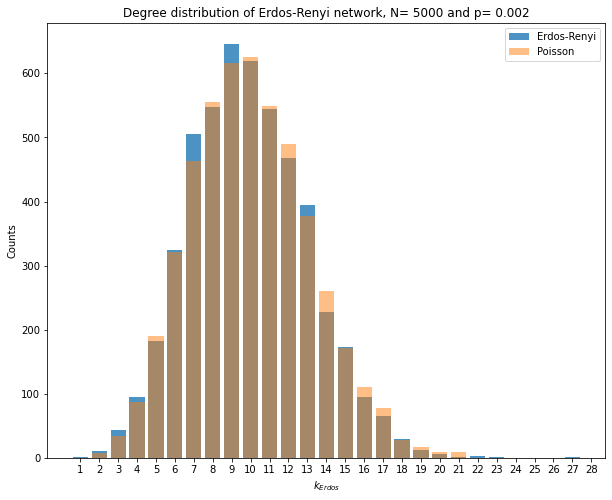

In [38]:
degree_distribution_erdos = np.array([degree for (_, degree) in G_erdos.degree()])
print(f"Shape of the degree distribution vector: {degree_distribution_erdos.shape}")

# Use numpy.histogram to create a bin edges vector and a counts (hist) vector
v = np.arange(degree_distribution_erdos.min(), degree_distribution_erdos.max()+1, 1)
hist, bin_edges = np.histogram(degree_distribution_erdos, bins=v)

fig = plt.figure(figsize=(10,8))
plt.bar(bin_edges[:-1], hist, label='Erdos-Renyi', alpha=0.8)
plt.bar(bin_edges_p[:-1], hist_p, label='Poisson', alpha=0.5)
plt.xticks(v)
plt.xlabel('$k_{Erdos}$')
plt.ylabel('Counts')
plt.title(f"Degree distribution of Erdos-Renyi network, N= {n_erdos} and p= {np.round(p_erdos,3)}")
plt.legend()
plt.show()

# Part 2: Random networks and plotting in `networkx`
 
#### A.
In your notebook, work through NS exercise 3.1 ('Erdős-Rényi Networks'). The exercise can be found in Section 3.11: Homework.

> Erdős-Rényi Networks
Consider an Erdős-Rényi network with $N = 3000$ nodes, connected to each other with probability $p = 10^{–3}$.
>-  What is the expected number of links, 〈L〉?  
---

__Answer:__  
According to [Network Science, Chapter 3](http://networksciencebook.com/chapter/3#number-of-links), the expected number of links, $\langle L \rangle = p\frac{N(N-1)}{2}=4498.5\approx 4499$. The calculation is also shown in the following cell.

In [40]:
N = 3000 
p = 1e-3
L_avg = p*N*(N-1)/2
print(f"Average number of links L_average={L_avg}")

Average number of links L_average=4498.5


> - In which regime is the network?  
---  

__Answer:__  
According to [Network Science, Chapter 3](http://networksciencebook.com/chapter/3#evolution-network), we can look at $p$ and compare it to the value of $\frac{1}{N}$ for the subcritical, critical and supercritical regimes. When $p>1/N$, if $p>\frac{lnN}{N}$, the network is in the connected regime. Here, the network is in the **supercritical regime**, since $p=10^{-3}$ and $\frac{1}{N}\approx 3.3e-4$. As a result, $p>\frac{1}{N}$.   

Another way is to calculate the expected degree $ \langle k \rangle=p(N-1)$. If:  
  -  $0< \langle k \rangle < 1$: subcritical regime  
  -  $\langle k \rangle=1$: critical regime  
  -  $\langle k \rangle>1$: supercritical regime  
  -  $\langle k \rangle > lnN$: connected regime  

> - Calculate the probability $p_c$ so that the network is at the critical point.  
---  

__Answer:__  
For a given number of nodes $N$, the probability for the critical point is given as $p=\frac{1}{N}$. As a result, for $N=3000$, $p_c\approx 0.00033  = 3.33\cdot 10^{-4}$.

In [41]:
print(f"For the network to be in the critical point, with N= {N} nodes, p_cr={1/N}")

For the network to be in the critical point, with N= 3000 nodes, p_cr=0.0003333333333333333


> - Given the linking probability $p = 10^{–3}$, calculate the number of nodes $N_{cr}$ so that the network has only one component.  
---  

__Answer:__  
In order to have one (connected) component, the network should be in the connected regime. This happens when $ p > \frac{lnN}{N}$. Use brute force to find $N_{cr}$, where $N_{cr}$ is the first number of nodes where the condition of the connected regime is valid. The code is in the following cell, where the probability is considered fixed as $p=10^{-3}$.

In [85]:
# for n in range(10,10000):
#     a = np.log(n)/n
#     if np.abs(a-p) < 0.0000001: # calculate the difference with accuracy 1e-7
#         print(n)
#         # break    ## Just to see how many afterwardsif all number of nodes can have connected regimes


N_cr = 3 # start with N_cr equal to 3, and increment in the loop
while p<=(np.log(N_cr)/N_cr):
    N_cr+=1
    if N_cr==1e12: # safeguard condition to always exit the while loop
        print('N_cr not found')
        N_cr = None
        break
        
print(f"The critical number of nodes for the Erdos-Renyi network to have one connected component is {N_cr}.")

The critical number of nodes for the Erdos-Renyi network to have one connected component is 9119.


> - For the network in (d), calculate the average degree $\langle k^{cr} \rangle$ and the average distance between two randomly chosen nodes $\langle d \rangle$.  
---  

__Answer:__  
When $N_{cr} = 9119$ and $p=10^{-3}$, the average degree $\langle k^{cr} \rangle$ is calculated as:
$$
\langle k^{cr} \rangle = p\left(n_{cr}-1 \right) 
$$

In [86]:
k_avg_cr = p*(N_cr-1)
print(f"The average critical degree when N_cr={N_cr} and p={p} is: {k_avg_cr}")

The average critical degree when N_cr=9119 and p=0.001 is: 9.118


The average distance between two randomly chosen nodes $\langle d \rangle$ is calculated as:
$$
\langle d \rangle = \frac{ln N_{cr}}{ln \langle k^{cr} \rangle}
$$

In [87]:
distance_avg = np.log(N_cr)/np.log(k_avg_cr)
print(f"The average distance between to randomly chosen points in the Erdos network with p={p} and N=N_cr={N_cr} is: {np.round(distance_avg,3)}")

The average distance between to randomly chosen points in the Erdos network with p=0.001 and N=N_cr=9119 is: 4.125


> - Calculate the degree distribution $p_k$ of this network (approximate with a Poisson degree distribution).  
---  

__Answer:__  
According to [Network Science, Chapter 3](http://networksciencebook.com/chapter/3#degree-distribution), the degree distribution of a random network can be approximated by a Poisson distribution for large number of nodes $N$. For the Poisson distribution, the mean value or $\lambda$ is equal to $\langle k^{cr} \rangle$ and the standard deviation is $\sigma = \langle k^{cr}\rangle^{1/2}$. Here, $N=N_{cr}$ as calculated from above.

In [88]:
# Generate a Poisson distribution to approximate the random network in the connected regime from above
x_poisson = np.random.poisson(k_avg_cr, N_cr)

# Generate an equivalent random network
G_erdos_cr = nx.erdos_renyi_graph(N_cr, p)
degree_dist_erdos_conn = np.array([ degree for (node, degree) in G_erdos_cr.degree() ])

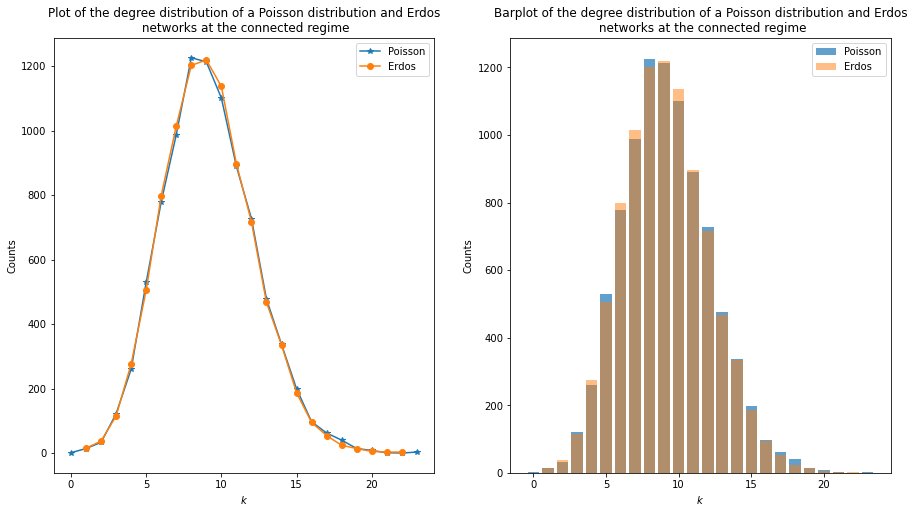

In [89]:
# Plot the histograms of the degree distribution of the random network and the Poisson distribution
v_poisson = np.arange(x_poisson.min(), x_poisson.max()+1,1)
hist_poisson, bin_edges_poisson = np.histogram(x_poisson, bins=v_poisson)

v_erdos = np.arange(degree_dist_erdos_conn.min(), degree_dist_erdos_conn.max()+1,1)
hist_erdos, bin_edges_erdos = np.histogram(degree_dist_erdos_conn, bins=v_erdos)

fig = plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.plot(bin_edges_poisson[:-1], hist_poisson, '*-', label="Poisson")
plt.plot(bin_edges_erdos[:-1], hist_erdos, 'o-', label='Erdos')
plt.legend()
plt.title("Plot of the degree distribution of a Poisson distribution and Erdos\n networks at the connected regime")
plt.xlabel('$k$')
plt.ylabel('Counts')

plt.subplot(1,2,2)
plt.bar(bin_edges_poisson[:-1], hist_poisson, alpha=0.7, label="Poisson")
plt.bar(bin_edges_erdos[:-1], hist_erdos, alpha= 0.5, label='Erdos')
plt.legend()
plt.title("Barplot of the degree distribution of a Poisson distribution and Erdos\n networks at the connected regime")
plt.xlabel('$k$')
plt.ylabel('Counts')


plt.show()

#### B. Paths.
Plot a random network with 200 nodes and an average degree of 1.5\. (I suggest using `networkx.draw` and reading [the documentation](https://networkx.github.io/documentation/stable/reference/drawing.html) carefully to get an overview of all the options and what they look like. For example, you may want to shrink the node size).  

---  

__Answer:__  
We know from [Network Science, Chapter 3](http://networksciencebook.com/chapter/3#number-of-links) that $\langle k \rangle = p(N-1)$. As a result, we can get $p=\frac{\langle k \rangle}{N-1}$ to generate the random network.

  

In [48]:
# Generate a random network with the provided parameters
N = 200 # 200 nodes in the random network
k_avg = 1.5
num_links_avg = N*k_avg/2.

G_random = nx.gnm_random_graph(N,num_links_avg)

Plot the random network

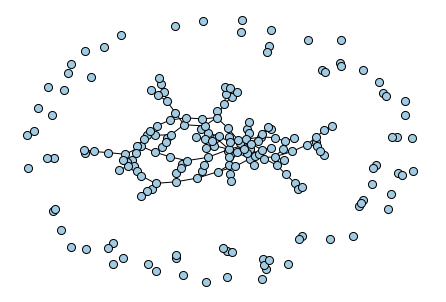

In [53]:
nx.draw(G_random, node_color="#A0CBE2" , node_size=65, edgecolors='k')

- * Extract the Giant Connected Component, GCC. (Hint. You can use `networkx.connected_component_subgraphs`)  
---
__Answer:__  
Since the documentation for `networkx.connected_component_subgraphs` is deprecated, the function `connected_components` is used. [Documentation](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.components.connected_components.html#connected-components)


In [54]:
Gcc_nodes = max(list(nx.connected_components(G_random))) # find the nodes that belong to largest connected component in G_random
Gcc = G_random.subgraph(Gcc_nodes) # create a subgraph of the giant connected component


* Choose a node at random from the GCC. (Hint: You may want to try `random.choice`.)

In [55]:
Gcc_nodeslist = np.array(list(Gcc.nodes())) # create a numpy array of the nodes of the GCC
random_node = np.random.choice(Gcc_nodeslist) # pick a random node from the GCC
print(f"Random node of GCC chosen: {random_node}")

Random node of GCC chosen: 25


* Find all nodes that are precisely 2 steps away from that node. (Hint. I suggest `networkx.single_source_shortest_path_length`)

In [56]:
num_steps = 2 # number of steps from the chosen node

# Search connected nodes to the randomly chose one, until a depth equal to num_steps.
nodes_connected_to_random = nx.single_source_shortest_path_length(Gcc, random_node,cutoff=num_steps) 

# Extract the nodes that are exactly num_steps away from the randomly chosen node of the GCC
nodes_at_steps = np.array([node for (node, steps) in nodes_connected_to_random.items() if steps==num_steps])

print(f"Nodes connected exactly {num_steps} steps from randomly chosen node {random_node}:\n{nodes_at_steps}")

Nodes connected exactly 2 steps from randomly chosen node 25:
[176   2  32]


* Plot the GCC with the following choice of colors. Starting node _black_ (`"#000000"`). The nodes 2 steps away _red_ (`"#ff0000"`). All other nodes _blue_ (`"#A0CBE2"`). Again, I suggest using `networkx.draw()` and reading [the documentation](https://networkx.github.io/documentation/stable/reference/drawing.html) carefully find out how to color individual nodes.

By the way, the default plot coming out of `networkx` doesn't look like the one below. But by tweaking parameters, you should be able to create something that looks like it.

![Sune's Network](https://raw.githubusercontent.com/suneman/socialgraphs2019/master/files/edge_colormap.png)

Text(0.5, 1.0, 'GCC of random network with N=200 and <k>=1.5')

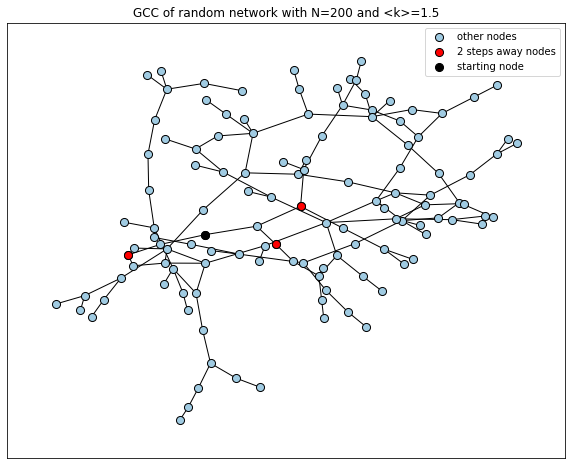

In [68]:
starting_node_col = '#000000' # black color for starting (randomly chose node)
n_steps_away_nodes_col = "#ff0000" # red color for the nodes num_steps away from starting node
other_nodes_col = "#A0CBE2" # color for all the other nodes

index_of_start_node = np.where(Gcc_nodeslist==random_node)[0]
indices_of_n_steps_nodes = [ np.where(Gcc_nodeslist==i)[0] for i in nodes_at_steps ]


fig = plt.figure(figsize=(10,8))
pos = nx.spring_layout(Gcc)

nx.draw_networkx_nodes(Gcc,pos=pos, node_color=other_nodes_col, node_size = 65, edgecolors='k', label='other nodes')
nx.draw_networkx_nodes(Gcc,pos=pos, nodelist=nodes_at_steps, node_color=n_steps_away_nodes_col, node_size = 65, edgecolors='k', label=f"{num_steps} steps away nodes")
nx.draw_networkx_nodes(Gcc,pos=pos, nodelist=[random_node], node_color=starting_node_col, node_size = 65, edgecolors='k', label="starting node")
nx.draw_networkx_edges(Gcc, pos=pos)

plt.legend()
plt.title(f'GCC of random network with N={N} and <k>={k_avg}')

# Part 3: Watts-Strogatz Networks

#### A.
Use `nx.watts_strogatz_graph` to generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity $p = 0, 0.1, \textrm{and} 1$.

In [3]:
n = 500 # number of nodes for each of the graphs
k_avg = 4 # average degree of each of the generated graphs
p = [0., 0.1, 1.] # rewiring probability array for the WS graphs to generate

# Generate the graphs
WS_graphs = []
for i in range(len(p)):
    G = nx.watts_strogatz_graph(n,k_avg, p[i])
    WS_graphs.append(G)

Calculate the average shortest path length $\langle d \rangle$ for each one.

In [4]:
# Calculate the average shortest path for each one
for i in range(len(p)):
    d_avg = nx.average_shortest_path_length(WS_graphs[i])
    print(f"Average shortest path length when p = {p[i]} is: {np.round(d_avg,3)}")

Average shortest path length when p = 0.0 is: 62.876
Average shortest path length when p = 0.1 is: 7.862
Average shortest path length when p = 1.0 is: 4.779


Describe what happens to the network when $p = 1$.  

---  
__Answer:__  
When $p=1$, the WS graph turns into a random network. Clustering is decreased. The small world phenomenon is visible, seen by the decrease in the average distance. As a result, the average distance between two nodes approaches the average degree of the network. In the same spirit as [Box 3.9, Network Science](http://networksciencebook.com/chapter/3#clustering-3-9), the three networks arising from the Watts-Strogatz model with the different probabilities are plotted in circular layout. This illustrates the transition to a random network and the decrease in  the average distance as $p$ grows from $0$ to $1$.

As a note to the first plot, each node is connected to its two neighbors and their immediate neighbors, but it is not easy to discern with this many nodes.

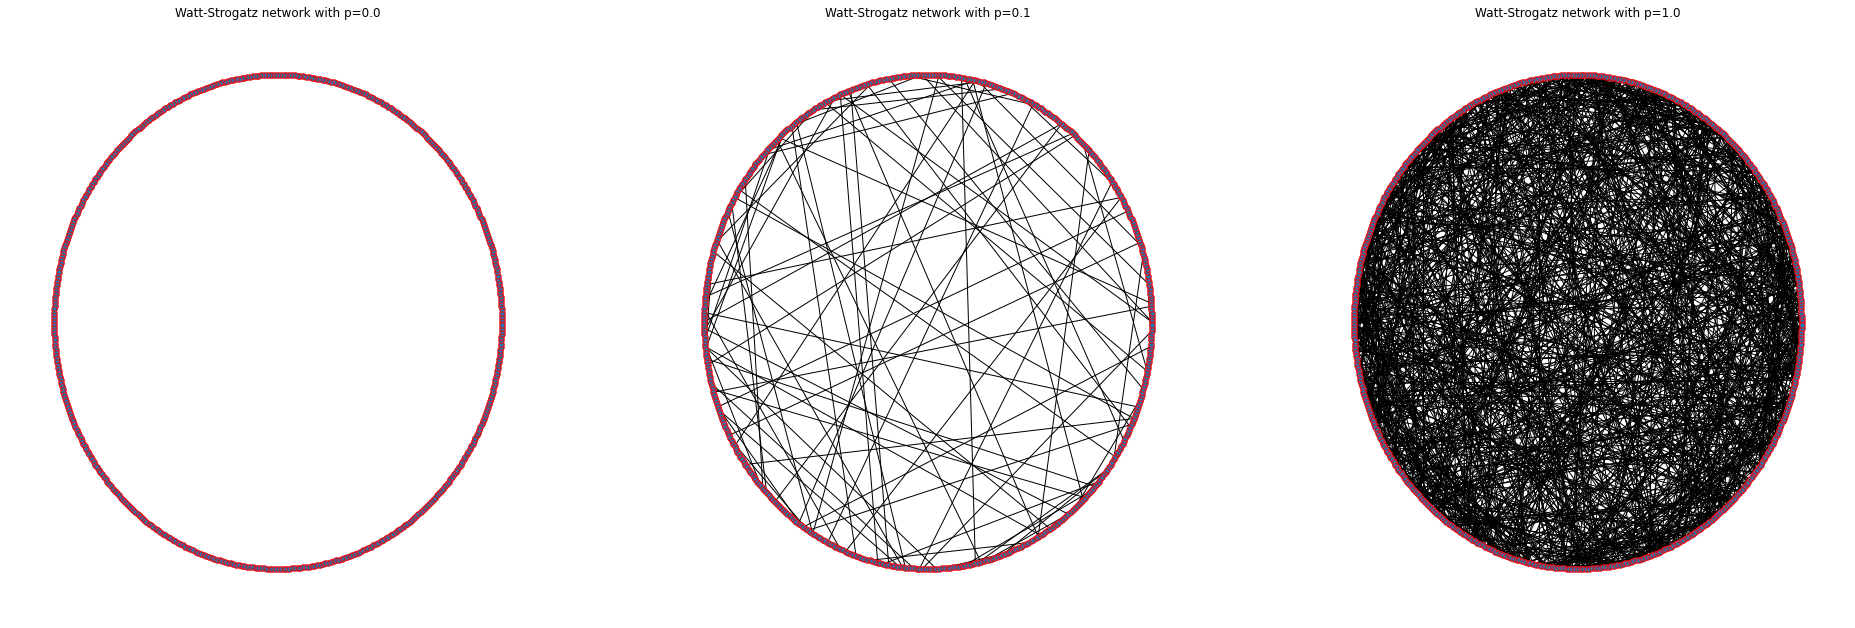

In [23]:
plt.figure(figsize=(33,11))

for i, network in enumerate(WS_graphs):
    plt.subplot(1,3,i+1)
    nx.draw_circular(network, node_size=30, edgecolors='r')
    plt.title(f"Watt-Strogatz network with p={p[i]}")
    

#### B.
Let's understand the behavior of the WS model as we increase _p_ in more detail.. Generate 50 networks with $N = 500$, $\langle k \rangle = 4$, for each of $p = \{0, 0.01, 0.03, 0.05, 0.1, 0.2\}$. Calculate the average of $\langle d \rangle$ as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring. Use the standard deviation to add errorbars to the plot. 

In [73]:
j = 50 # number of different networks to be generated for each probability p
n = 500 # number of nodes N for each network
k_avg = 4 # average degree for each network
p = [0, 0.01, 0.03, 0.05, 0.1, 0.2]

sigmas = np.zeros(len(p))
means = np.zeros(len(p))
for i in range(len(p)):
    d_avgs = np.array([ nx.average_shortest_path_length(nx.watts_strogatz_graph(n, k_avg, p[i]) ) for k in range(j) ])
    sigmas[i] = d_avgs.std()
    means[i] = d_avgs.mean()

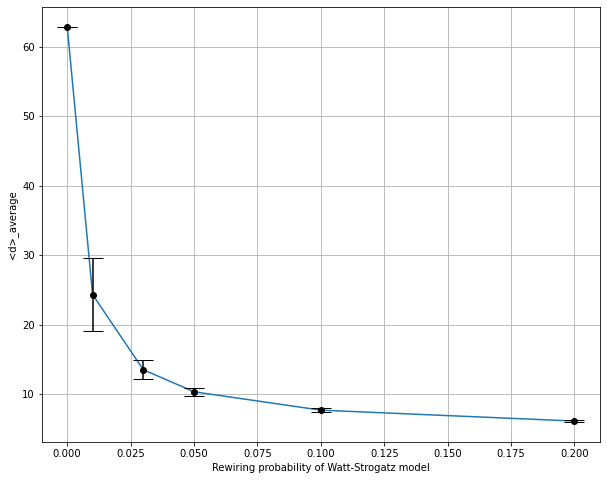

In [75]:
fig = plt.figure(figsize=(10,8))
plt.plot(p, means, '-')
plt.errorbar(p, means,yerr=sigmas, capsize=10, fmt='ko')
plt.xlabel('Rewiring probability of Watt-Strogatz model')
plt.ylabel('<d>_average')
plt.grid()

plt.show()

# Part 4. The Barabasi-Albert Model

We're going to create our own Barabasi-Albert model (a special case) in right in a `notebook`. Follow the recipe below for success

#### A. 
Create a 100 node BA network using a BA model that you've coded on your own (so don't use the built-in NetworkX function, but the one you created during week 3). And plot it using NetworkX.  

---  
__Answer:__  
The Barabasi-Albert model for scale-free networks is described in [Network Science, Chapter 5](http://networksciencebook.com/chapter/5#barabasi-model). The following process for growing the model is described in the book, as well as in the exercise for [week 3 of the course Social Graphs and Interactions](https://nbviewer.org/github/SocialComplexityLab/socialgraphs2022/blob/main/lectures/Week3.ipynb#Part-2:-Scale-free-networks):  
 - Create a graph with two connected nodes.

In [3]:
G_BA = nx.Graph() # Create a graph with 2 nodes, that has a single link
G_BA.add_nodes_from([0,1])
G_BA.add_edge(0,1)

Continue growing the network until it has 100 nodes.

In [4]:
max_number_of_nodes = 100 # number of desired nodes in the BA network

new_node = 0 # starting node. If the node exists already, it will not be added
while len(list(G_BA.nodes()))<max_number_of_nodes:
    if new_node in list(G_BA.nodes()):
        new_node +=1
        continue
    flattened_edge_list = np.array(list(G_BA.edges())).flatten()
    node_to_connect = np.random.choice(flattened_edge_list)
    G_BA.add_edge(new_node,node_to_connect)
    new_node += 1

Plot the created BA network

Text(0.5, 1.0, 'Plot of network following Barabasi-Albert model')

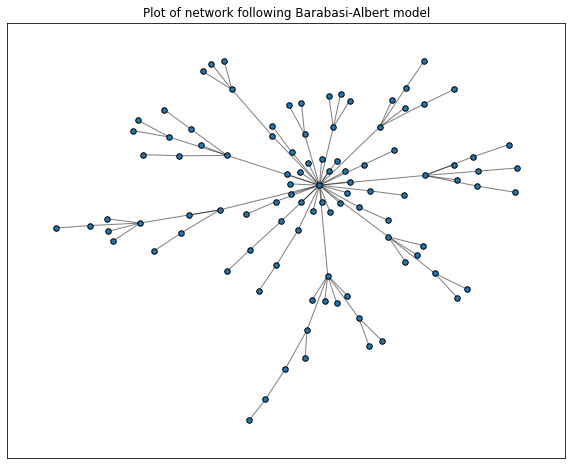

In [5]:
fig = plt.figure( figsize=(10, 8))

pos = nx.spring_layout(G_BA)
nx.draw_networkx_nodes(G_BA, pos, node_size=30, edgecolors='k')
nx.draw_networkx_edges(G_BA, pos,  alpha=0.5)
plt.title("Plot of network following Barabasi-Albert model")


#### B. 
Now create a 5000 node network.  
  
 ---    
 Continuing with the same network as in the previous exercise. Keep growing it from 100 to 5000 nodes. 

In [6]:
max_number_of_nodes = 5000

new_node = 0
while len(list(G_BA.nodes()))<max_number_of_nodes:
    if new_node in list(G_BA.nodes()):
        new_node +=1
        continue
    flattened_edge_list = np.array(list(G_BA.edges())).flatten()
    node_to_connect = np.random.choice(flattened_edge_list)
    G_BA.add_edge(new_node,node_to_connect)
    new_node += 1
    
print(f"The number of nodes in the G_BA network is: {len(list(G_BA.nodes))}")

The number of nodes in the G_BA network is: 5000


* What's the maximum and minimum degree?  

In [7]:
# Find the degrees of each node in the network
degree_distribution = np.array([ degree for (node, degree) in G_BA.degree() ])
max_degree = degree_distribution.max()
min_degree = degree_distribution.min()

# Find the nodes that have the maximum and minimum degrees
node_with_max_degree = np.where(degree_distribution == max_degree)[0]
node_with_min_degree = np.where(degree_distribution == min_degree)[0]


print(f"The maximum degree of the G_BA network is: {max_degree}, at node {node_with_max_degree[0]}.")
print(f"The minimum degree of the G_BA network is: {min_degree}, observed for {len(node_with_min_degree)} nodes.")


The maximum degree of the G_BA network is: 237, at node 0.
The minimum degree of the G_BA network is: 1, observed for 3337 nodes.


* Now, bin the degree distribution, for example using `numpy.histogram`.

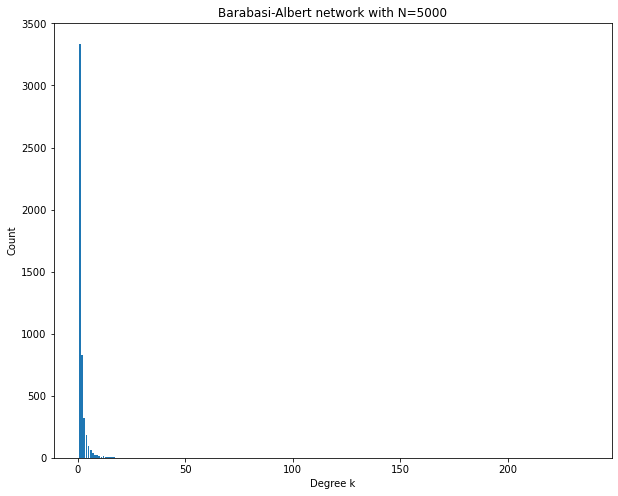

In [8]:
v = np.arange(min_degree, max_degree+1, 1)
hist, bin_edges = np.histogram(degree_distribution, bins=v)

fig = plt.figure(figsize=(10,8))
plt.bar(bin_edges[:-1], hist)
plt.xlabel('Degree k')
plt.ylabel('Count')
plt.title(f'Barabasi-Albert network with N={max_number_of_nodes}')
plt.show()

  
  * Plot the distribution. Plot it with both linear and log-log axes.

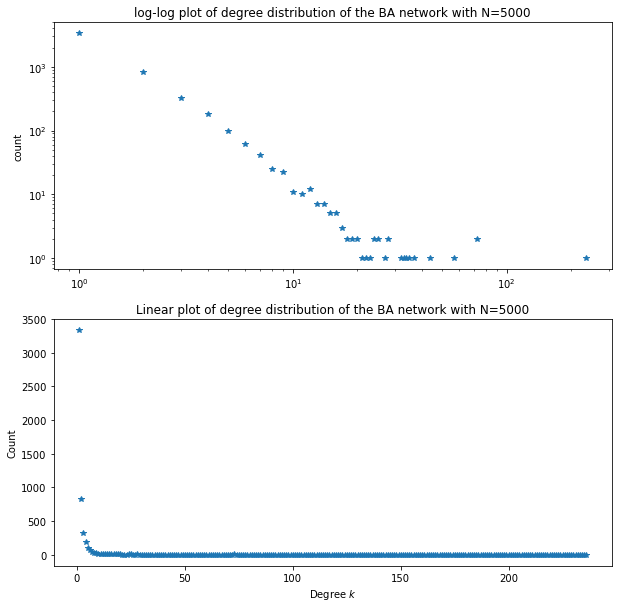

In [9]:
fig = plt.figure(figsize=(10,10))

ax0 = fig.add_subplot(2,1,1)
plt.plot(bin_edges[:-1], hist, '*')
ax0.set_ylabel('count')
ax0.set_yscale('log')
ax0.set_xscale('log')
ax0.set_title(f'log-log plot of degree distribution of the BA network with N={max_number_of_nodes}')


ax1 = fig.add_subplot(2,1,2)
plt.plot(bin_edges[:-1], hist, '*')
ax1.set_ylabel('Count')
ax1.set_xlabel("Degree $k$")
ax1.set_title(f'Linear plot of degree distribution of the BA network with N={max_number_of_nodes}')

plt.show()

# Part 5. Power-laws and the friendship paradox


Next step is to explore the [Friendship paradox](https://en.wikipedia.org/wiki/Friendship_paradox). This paradox states that _almost everyone_ has fewer friends than their friends have, on average\*. This sounds crazy, but is actually an almost trivial consequence of living in a social network with a power-law degree distribution. The explanation is that almost everyone is friends with a hub, that drives up the average degree of the friends. Let's explore that in the 5000 node BA network we've just generated (let's call this network **F-BA** for *friendship BA*). Do the following:

In [10]:
import copy

# Rename the network G_BA from the previous part as F_BA
F_BA = copy.deepcopy(G_BA)

#### A. The friendship paradox in BA networks
* Pick a node $i$ at random (e.g. use `random.choice`). [Find its degree](https://networkx.github.io/documentation/stable/reference/classes/generated/networkx.Graph.degree.html).

In [11]:
random_node = np.random.choice(list(F_BA.nodes()))
random_node_degree = F_BA.degree[random_node]

print(f'Random node: {random_node}')
print(f'Degree of the chosen node: {random_node_degree}')

Random node: 2356
Degree of the chosen node: 1


* Find $i$'s [neighbors](https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.Graph.neighbors.html?highlight=neighbors#networkx.Graph.neighbors). And calculate their average degree.  
---  
Here, the function `neighbors` is used. [Documentation](https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.neighbors.html?highlight=neighbors). However, the neighbors of node $n$ in a network $G$ can also be accessed using the notation `G[n]`. 

In [12]:
neighbors_nodelist = list(F_BA[random_node])
neighbors_degrees = [F_BA.degree(node) for node in neighbors_nodelist]
print(f'The neighboring nodes to node {random_node} are: {neighbors_nodelist},\nwith degrees: {neighbors_degrees} respectively.')

The neighboring nodes to node 2356 are: [651],
with degrees: [5] respectively.


* Compare the two numbers to check if it's true that $i$'s friends (on average) have more friends than $i$.

In [13]:
avg_neighbor_degree = nx.average_neighbor_degree(F_BA)[random_node]
print(f'The degree ofthe randomly chosen node {random_node} is {random_node_degree}.')
print(f"The average degree of its neighbors is {avg_neighbor_degree}")
print(f'Do the friends of node {random_node} have more friends on average than node {random_node} itself?: {avg_neighbor_degree>random_node_degree}')

The degree ofthe randomly chosen node 2356 is 1.
The average degree of its neighbors is 5.0
Do the friends of node 2356 have more friends on average than node 2356 itself?: True


* Do this 1000 times. How many out of those 1000 times is the friendship paradox true in **F-BA**?

In [14]:
num_of_reps = 1000
num_events = 0 # number of times where node i has more friends than the average of its neighbors
for i in range(num_of_reps):
    random_node = np.random.choice(list(F_BA.nodes()))
    random_node_degree = F_BA.degree[random_node]
    neighbors_nodelist = list(F_BA[random_node])
    neighbors_degrees = [F_BA.degree(node) for node in neighbors_nodelist]
    avg_neighbor_degree = nx.average_neighbor_degree(F_BA)[random_node]
    if avg_neighbor_degree>random_node_degree:
        num_events += 1
        
print(f"The friendship paradox is true for {num_events} out of {num_of_reps} repetitions, approximately {100*np.round(num_events/num_of_reps,3)}%.")    

The friendship paradox is true for 882 out of 1000 repetitions, approximately 88.2%.


#### B. The friendship paradox more generally
* What if the power law is flatter, e.g. $p(k) \sim k^{-\gamma}$ with $\gamma = 1.5$? Will the fraction of times the paradox is true be higher or lower? 
 - First answer this question by simply reasoning. Think about what it would mean in terms of hubs that the power law is flatter?  
 ---  
 __Answer:__  
 Since $\gamma<2$, then it is expected that with $k_{min} = 1$, the maximum degrees of a node in the network to be $k_{max} = N^{\frac{1}{\gamma-1}}=N^{2}$. Something like this is not possible in reality, but means that the hub is connected to all the nodes. Then, all nodes are connected to the hub and as a result, for a random node, the chances of having the hub as neighbor are close to 1. Ince the hub is connected to all nodes, the its degree is the number of nodes. So, it is expected that the friendship paradox is always confirmed, save for the case the hub is selected randomly.

- Now simulate a new network with the slope mentioned above. You can generate networks with power-law degree distributions using the [configuation model](https://en.wikipedia.org/wiki/Configuration_model). The `networkx` funtion is here [`nx.configuration_model`](https://networkx.org/documentation/stable/reference/generated/networkx.generators.degree_seq.configuration_model.html). I suggest you make the network pretty big ... let's say 5000 nodes or more.
    * Hint 0: In the `networkx` function mentioned above, you need a degree sequence. This can be created using the so-called transformation method. If we can generate a random real number $r$ uniformly distributed in the range $0 \leq r < 1$, then $x = x_{\textrm{min}}(1 – r)^{-1/\alpha - 1}$ is a random power-law-distributed real number in the range $x_{\textrm{min}} \leq x < \infty$ with exponent $\alpha$. Note that there has to be a lower limit $x_\textrm{min}$ on the range; the power-law distribution diverges as $x\rightarrow 0$. See [this paper](https://www.cs.cornell.edu/courses/cs6241/2019sp/readings/Newman-2005-distributions.pdf) for more details.
    * Hint 1: The sequence generated using the method mentioned above consists of real numbers, we need integers, so it needs to be rounded as well.
    * Hint 2: Also, due to some details of how the configuation works (see the [wiki page](https://en.wikipedia.org/wiki/Configuration_model) for details), the sequence cannot have a sum which is an odd number, so if your sequence turns out odd, just choose an element and add 1 to its degree, that way the sum will be an even number.

In [15]:
num_of_nodes = 5000
x_min = 1
r = np.random.uniform(0.,1., size=num_of_nodes)
a = 1.5
x = np.round(x_min*(1-r)**(-1/(a-1))).astype(int)

# need sum over the sequence elements to be even
if np.sum(x)%2!=0:
    i = np.random.randint(0,num_of_nodes)
    x[i]+=1


# Create configuration model network, call it CN
CN = nx.configuration_model(x)

- Did you reason correctly above? For what fraction of the time is the friendship paradox true for your network with a new slope?

In [16]:
num_of_reps = 1000
num_events = 0 # number of times where node i has more friends than the average of its neighbors
for i in tqdm(range(num_of_reps)):
    random_node = np.random.choice(list(CN.nodes()))
    random_node_degree = CN.degree[random_node]
    neighbors_nodelist = list(CN[random_node])
    avg_neighbor_degree = nx.average_neighbor_degree(CN)[random_node]
    if avg_neighbor_degree>random_node_degree:
        num_events += 1
        
print(f"The friendship paradox is true for {num_events} out of {num_of_reps} repetitions, or approximately {100*np.round(num_events/num_of_reps,3)}%")  

The friendship paradox is true for 992 out of 1000 repetitions, or approximately 99.2%


- Now generate a network for the configuration model that has *the same slope and number of nodes as **F-BA** in 5.A above*; let's call this new network **F-CM** (for *friendship configuration model*). 
   - What fraction of the time is the friendship paradox is true for the **F-CM** network?

In [17]:
num_of_nodes = max_number_of_nodes # from exercise in Part 4
degree_dist = np.array([ degree for (node, degree) in F_BA.degree ]).astype(int)
k_min = 1

if np.sum(degree_dist)%2!=0:
    i = np.random.randint(0, num_of_nodes)
    degree_dist[i]+=1

F_CM = nx.configuration_model(degree_dist)

In [19]:
num_of_reps = 1000
num_events = 0 # number of times where node i has more friends than the average of its neighbors
for i in tqdm(range(num_of_reps)):
    random_node = np.random.choice(list(F_CM.nodes()))
    random_node_degree = F_CM.degree[random_node]
    neighbors_nodelist = list(F_CM[random_node])
    avg_neighbor_degree = nx.average_neighbor_degree(F_CM)[random_node]
    if avg_neighbor_degree>random_node_degree:
        num_events += 1
        
print(f"The friendship paradox is true for {num_events} out of {num_of_reps} repetitions, or approximately {100*np.round(num_events/num_of_reps,3)}%.")  

  0%|          | 0/1000 [00:00<?, ?it/s]

The friendship paradox is true for 640 out of 1000 repetitions, or approximately 64.0%.


   - Assuming that **F-BA** and **F-CM** have the same degree sequence can now *think* about if **F-BA** and **F-CM** are different with respect to the friendship paradox. Specifically, please explain your thoughts on the following topics
      * Are there factors beyond the degree-distribution that could impact how frequently the friendship paradox is true? I might consider how network properties like assortativity, clustering, community-structure, etc potentially could impact things (it's OK to search online and add references to your answer).

---  
- _Assortativity_:  

From [Wikipedia](https://en.wikipedia.org/wiki/Assortativity), _Assortativity_ is " a preference for a network's nodes to attach to others that are similar in some way".

According to [Box 7.2, Network Sceince](http://networksciencebook.com/chapter/7#measuring-degree), the  Degree Correlation Coefficient is used to inspect both networks if they show assortative behavior. This shows whether hubs tend to connect to other hubs (assortative), or to low degree nodes (disassortative). The coeffcient takes values $-1\leq r\leq1$. If $r < 0$, then the network shows disassortative behavior. If $r=0$, neutral behavior, and if $r>0$ assortative behavior. 

Here, the function `degree_pearson_correlation_coefficient` in the library `networkx` will be used to estimate the correlation coefficient for each network.

In [39]:
assort_coef_F_BA = nx.degree_pearson_correlation_coefficient(F_BA)
assort_coef_F_CM = nx.degree_pearson_correlation_coefficient(F_CM)

print(f"Correlation coefficient for network F_BA: {assort_coef_F_BA}")
print(f"Correlation coefficient for network F_CM: {assort_coef_F_CM}")

Correlation coefficient for network F_BA: -0.05282610669766893
Correlation coefficient for network F_CM: -0.011228353745486945


Both networks show disassortative behavior, meaning that the hubs tend to connect to low degree nodes. As a result, when a random node is chosen, it tends to have a hub as a neighbor. Thus the friendship paradox holds. Network __F_BA__ shows more of the disassortative behavior, thus it is expected to exhibit the friendship paradox more often.

 - _Clustering_:  
 We look at the number of edges shared between the neighbors of each cluster. If the average clustering coefficient $\langle C \rangle$ [Network Science, Chapter 2](http://networksciencebook.com/chapter/2#clustering) is low, close to 0, then for a random node to be connected to a hub, the possibility is greater. The hub, with the highest degree will be connected to nodes which are not connected between them, connected to the hub itself if $\langle C \rangle =0$.

In [119]:
def get_average_clustering(network):
    '''
    Return the average clustering coefficient of the network
    
    Input:
        network: a networkx graph object
    
    Output:
        C: float, the average clustering coefficient
    '''
    nodes_list = list(network.nodes()) # get all the nodes of the network to iterate over
    c_is = np.zeros(len(nodes_list)) # create an empty array for the local clustering coefficients
    for k, node in enumerate(nodes_list):
        k_i = network.degree(node)
        if k_i<=1: # Avoid division by zero.
            continue
        neigh_list = list(network.neighbors(node))
        sum_ = 0 # total number of edges between neighbors
        for i , neigh in enumerate(neigh_list[:-1]): # the first element in the neighbors
            for el in neigh_list[i+1:]: # all the others. To avoid double counting number of edges.
                sum_ += network.number_of_edges(neigh, el)
        
        c_is[k] = 2*sum_/(k_i*(k_i-1)) # definition of local clustering coefficient        
    return c_is.sum()/len(nodes_list) # Average over all nodes


C_avg_F_BA = get_average_clustering(F_BA)
C_avg_F_CM = get_average_clustering(F_CM)


print(f"C average for F_BA: {C_avg_F_BA}")
print(f"C average for F_CM: {C_avg_F_CM}")


C average for F_BA: 0.0
C average for F_CM: 0.0026774431150896594


Comparing the average clustering coefficient, __F_BA__'s nodes are more likely to be connected to a high degree node. Then the friendship paradox will hold. It does not hold only if the random node is the high degree node itself.

 * How would you test more rigorously if the friendship-paradox is actually true equally often in **F-BA** and **F-CM**? (E.g. how would you run a statistical test to investigate ... or how would you put error-bars on your plots?)  
 ---
We can run a number of sampling for both networks. Then retrieve the mean and standard deviation of the number of times the friendship paradox is `True` for each network.

In [20]:

def fp_counts(network, nodes_list):
    '''
    Returns the number of times the friendship paradox (fp) holds, out of the nodes in the nodes_list
    
    Inputs:
        network: a networkx graph object
        nodes_lis: an array of nodes from network
        
    Output:
        num_of_events: int, the number of times the fp holds for the nodes in nodes_list
    
    Example:
        number_of_fp_counts = fp_counts(G, [1,2,3])
    '''
    num_events = 0
    
    for node in nodes_list:
        random_node_degree = network.degree[node]
        neighbors_nodelist = list(network[node])
        avg_neighbor_degree = nx.average_neighbor_degree(network)[node]
        if avg_neighbor_degree>random_node_degree:
            num_events += 1
    return num_events

In [23]:

num_of_samplings = 25 # how many times will each network be sampled
num_of_nodes_samples = 500 # how many random samples without replacement per cycle, will we drawn from each network, per sampling cycle

# Initialize the vector that stores for each sampling round how many times the friendship paradox holds (is True)
# the mean and std will be retrived from these vectors
prc_fp_F_BA = np.zeros(num_of_samplings)
prc_fp_F_CM = np.zeros(num_of_samplings)

for sampling_number in tqdm(range(num_of_samplings)):
    
    random_nodes_F_BA = np.random.choice(np.array(list(F_BA.nodes())), num_of_nodes_samples)
    random_nodes_F_CM = np.random.choice(np.array(list(F_CM.nodes())), num_of_nodes_samples)
    
    num_fp_holds_F_BA = fp_counts(F_BA, random_nodes_F_BA) # number of times friendship paradox holds for F-BA 
    num_fp_holds_F_CM = fp_counts(F_CM, random_nodes_F_CM) # for F-CM
    
    prc_fp_F_BA[sampling_number] = num_fp_holds_F_BA/num_of_nodes_samples
    prc_fp_F_CM[sampling_number] = num_fp_holds_F_CM/num_of_nodes_samples
    

mean_F_BA = prc_fp_F_BA.mean()
std_F_BA = prc_fp_F_BA.std()

mean_F_CM = prc_fp_F_CM.mean()
std_F_CM = prc_fp_F_CM.std()

print(f"Out of {num_of_samplings} sample rounds, with {num_of_nodes_samples} nodes sampled per network.")
print(f"F_BA mean: {mean_F_BA}, standard deviation: {std_F_BA}")
print(f"F_CM mean: {mean_F_CM}, standard deviation: {std_F_CM}")


  0%|          | 0/25 [00:00<?, ?it/s]

Out of 25 sample rounds, with 500 nodes sampled per network without replacement.
F_BA mean: 0.8664000000000001, standard deviation: 0.013971399357258395
F_CM mean: 0.63792, standard deviation: 0.020281853958649856


Plot a histogram of the mean values with errorbars. It can be seen that the frienship paradox is more prevalent in the __F_BA__ model, with smaller standard deviation.

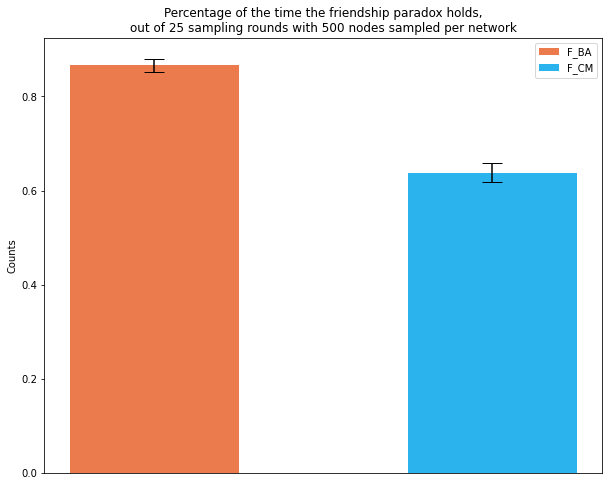

In [24]:
fig = plt.figure(figsize=(10,8))

pos_F_BA = 1.5
width = 0.5
pos_F_CM = 0.5 + width+pos_F_BA

plt.bar(pos_F_BA, mean_F_BA, width=width, color='#eb7a4d', yerr=std_F_BA, capsize=10,label='F_BA', alpha=1)
plt.bar(pos_F_CM, mean_F_CM, width=width, color='#2bb3ed', yerr=std_F_CM, capsize=10,label="F_CM", alpha=1)

plt.ylabel('Counts')
plt.title(f"Percentage of the time the friendship paradox holds,\nout of {num_of_samplings} sampling rounds with {num_of_nodes_samples} nodes sampled per network")
plt.xticks([])
plt.legend()

plt.show()

We create the null hypothesis:
    <center>$H_{0}$: The friendship paradox appears in the teo networks the same number of times</center>

In [35]:
from scipy import stats

s1 = (std_F_BA**2)/num_of_samplings # dummy variable to hold a value that is used repeatedly
s2 = s1 = (std_F_CM**2)/num_of_samplings

sigma_delta = np.sqrt( s1 + s2 ) # similar to pooled variance
t_statistic = (mean_F_BA - mean_F_CM)/sigma_delta


num = ( s1 + s2 )**2
den = (s1**2)/(num_of_samplings-1) + (s2**2)/(num_of_samplings-1)
dofs = num/den

a_conf = 0.05 # for confidence interval calculation

p_val = 2*(1-stats.t.cdf(x=t_statistic, df=dofs)) # twos-sided p-value, for the absolute of t-statistic

print(f'p-value= {p_val}, a= {a_conf}')
print(f"Is the two-sided p-value lower in value than the desired a={a_conf}?: {p_val<a_conf}")

Is the two-sided p-value lower in value than the desired a=0.05?: True


Since the $p-value$ is much smaller than $a$, then we reject the null hypothesis $H_{0}$. No further corrections are applied, since at this point we do not care about Type-I or Type-II errors.

# Part 6. Growth without Preferential Attachment

Finally, we'll build a network of same size and degree as in Part 5, using the growth mechanism without the preferential attachment. Follwo the steps below for success

* Grow a network with the same parameters as above, i.e. 5000 nodes, each new node connects to the existing network, *but have the incoming nodes connect to the existing nodes with* **equal probability**. Let's call this the Sune-network.

In [47]:
num_of_nodes = max_number_of_nodes # same as the F_CA network
G_sune = nx.Graph()
G_sune.add_edge(0,1)

number_of_steps = 0 # initialize the number of steps needed to grow the network from the 2 initial nodes
new_node = 0 # initialize the node value to add
while len(list(G_sune.nodes()))<num_of_nodes:
    if new_node in list(G_sune.nodes()):
        new_node +=1
        continue
    node_list = np.array(list(G_sune.nodes()))
    node_to_connect = np.random.choice(node_list) # random choice between the existing nodes
    G_sune.add_edge(new_node,node_to_connect)
    new_node += 1
    number_of_steps+=1
    
print(f"Number of nodes of the Sune network: {len(list(G_sune.nodes()))}")

Number of nodes of the Sune network: 5000


* Generate an ER network of same size and same $p$ as the Sune-network. 

In [56]:
m0 = 2 # starting number of nodes
average_degree_sune = np.array([ degree for (node, degree) in G_sune.degree() ]).sum()/num_of_nodes
p_er =  average_degree_sune/(num_of_nodes-1) # calculate p for the random network
G_er = nx.erdos_renyi_graph(num_of_nodes, p_er)



* What are the differences between the ER network and the Sune-network? Explain in your own words. 
  * *Hints*: To get started, plot the two degree distribution in the same plot. Compare and contrast. Another revealing network property to study is the the number of connected components.

In [57]:
degree_dist_sune = np.array([ degree for (node, degree) in G_sune.degree() ])
degree_dist_er = np.array([ degree for (node, degree) in G_er.degree() ])

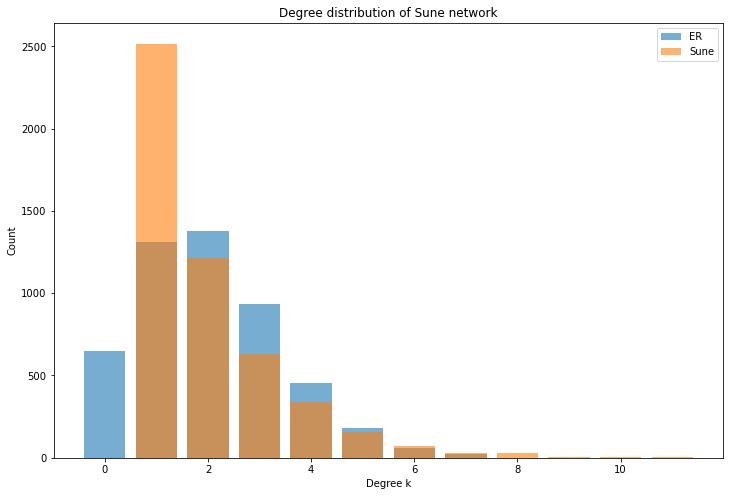

In [94]:
v_sune = np.arange(degree_dist_sune.min(), degree_dist_sune.max()+1, 1)
v_erdos = np.arange(degree_dist_er.min(), degree_dist_er.max()+1, 1)

fig = plt.figure(figsize=(12,8))


hist_er, bin_edges_er = np.histogram(degree_dist_er, bins= v_erdos)
plt.bar(bin_edges_er[:-1], hist_er, label='ER', alpha=.6)
plt.xlabel('Degree k')
plt.ylabel('Count')
plt.title(f'Degree distribution of Erdos-Renyi network')

hist_sune, bin_edges_sune = np.histogram(degree_dist_sune, bins= v_sune)
plt.bar(bin_edges_sune[:-1], hist_sune, label = 'Sune', alpha=0.6)
plt.xlabel('Degree k')
plt.ylabel('Count')
plt.title(f'Degree distribution of Sune network')



plt.legend()
plt.show()

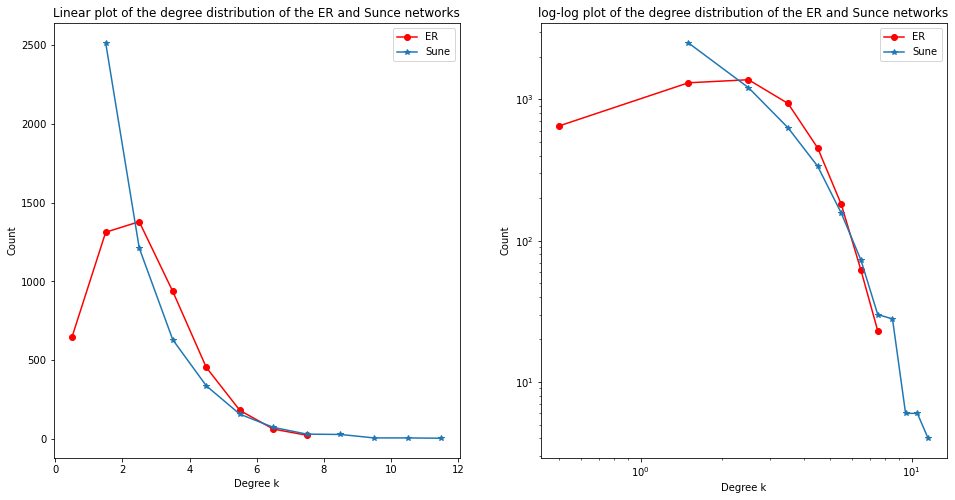

In [86]:
# Center the x-axes
x_er = [(bin_edges_er[i]+bin_edges_er[i+1])/2. for i in range(len(hist_er))]
x_sune = [(bin_edges_sune[i]+bin_edges_sune[i+1])/2. for i in range(len(hist_sune))]

# plot distributions
fig = plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
plt.plot(x_er, hist_er, 'ro-', label='ER')
plt.plot(x_sune, hist_sune, '*-', label="Sune")
plt.title('Linear plot of the degree distribution of the ER and Sunce networks')
plt.ylabel('Count')
plt.xlabel('Degree k')
plt.legend()


plt.subplot(1,2,2)
plt.semilogx(x_er, hist_er, 'ro-', label='ER')
plt.semilogx(x_sune, hist_sune, '*-', label="Sune")
plt.yscale('log')
plt.title('log-log plot of the degree distribution of the ER and Sunce networks')
plt.ylabel('Count')
plt.xlabel('Degree k')
plt.legend()

plt.show()

The minimum, maximum and average degree of the Sune network is be contrasted compared to the ER one.

In [122]:
max_degree_sune = degree_dist_sune.max()
min_degree_sune = degree_dist_sune.min()

max_degree_er = degree_dist_er.max()
min_degree_er = degree_dist_er.min()

min_deg_nodes_er = np.where(degree_dist_er==min_degree_er)[0]
min_deg_nodes_sune = np.where(degree_dist_sune==min_degree_sune)[0]


average_degree_er = degree_dist_er.sum()/num_of_nodes

nodes_deg_hi_er = np.where(degree_dist_er>average_degree_er)[0]
nodes_deg_hi_sune = np.where(degree_dist_sune>average_degree_sune)[0]


print("Minimum and maximum degrees\n\n")
print(f"Minimum degree of the ER network is {min_degree_er}, observed at {len(min_deg_nodes_er)} nodes")
print(f"Minimum degree of the Sune network is {min_degree_sune}, observed at {len(min_deg_nodes_sune)} nodes")
print()
print(f"Maximum degree of the ER network is {max_degree_er}.")
print(f"Maximum degree of the Sune network is {max_degree_sune}.")
print()
print(f"Average degree of the ER network is {degree_dist_er.sum()/num_of_nodes}.")
print(f"Average degree of the Sune network is {average_degree_sune}.")
print()
print(f"Percentage of nodes with degree higher than the average for ER network:{np.round(len(nodes_deg_hi_er)/num_of_nodes*100,3)}%")
print(f"Percentage of nodes with degree higher than the average for Sune network:{np.round(len(nodes_deg_hi_sune)/num_of_nodes,3)*100}%")

Minimum and maximum degrees


Minimum degree of the ER network is 0, observed at 650 nodes
Minimum degree of the Sune network is 1, observed at 2516 nodes

Maximum degree of the ER network is 8.
Maximum degree of the Sune network is 12.

Average degree of the ER network is 2.0288.
Average degree of the Sune network is 1.9996.

Percentage of nodes with degree higher than the average for ER network:33.14%
Percentage of nodes with degree higher than the average for Sune network:49.7%


The degree distribution of the ER network resembles a Poisson distribution more closely. This can be seen by the barplots of the degree distributions and also from the linear plot in the previous figures. Moreover, in the log-log plot of the degree distributions, the Sune model tends to approach the straight line indicating the power law more closely than the ER network. This is visible especially for the lowest degree.

For the Sune network, the majority of the nodes have degree below or equal to the average. Howeverm for the ER network the majority of the nodes have degree around the average, typical of the random networks.  

The number of connected components is investigated in the following.

In [123]:
# Connected components for ER network
connected_components_list_er = list(nx.connected_components(G_er))
print(f"The number of connected components in the ER network is {len(connected_components_list_er)}.")


The number of connected components in the ER network is 764.


Compared to the Sune network, which is 1 connected component, the ER network resembles a random network in the supercritical  regime, since $p= \frac{\langle k_{sune} \rangle }{N-1} =0.0004 > \frac{1}{N}$. It is expected that there will be numerous isolated components as well as a giant connected component. In order for the ER network to be in the connected regime adn have 1 component, $p$ should be equal to $\frac{lnN}{N}\approx0.0017$.